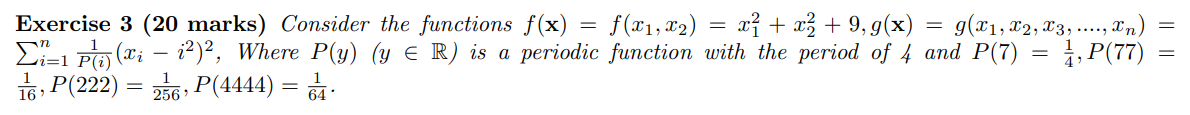

In [15]:
def f(x1,x2):
    return x1*x1 + x2*x2 + 9

In [16]:
def df_dx1(x1,x2):
    return 2*x1

In [17]:
def df_dx2(x1,x2):
    return 2*x2

In [18]:
# def g()

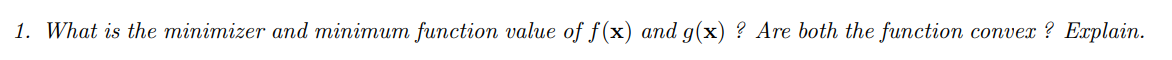

*F()*  
Minimizer: (0,0)  
Minimum function value: 0  
Hessian Matrix: Identity matrix*2  
Hessian matrix is positive semi definite as all eigen values are positive(ie. diagonal elements = 2) 

*G()*  
Minimizer: (i*i for i in range(1 to n)), because P(i) is always positive for integers  
Minimum function value: 0  
Hessian Matrix: Diagonal matrix with diagonal element of ith row = 2/P(i)  
Hessian matrix is positive semi definite as all eigen values are positive(ie. diagonal elements are 2/P(i))  

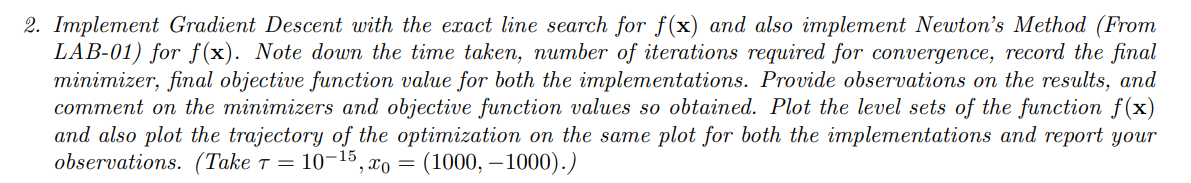

##### Newtons method for f(x)

In [19]:
import numpy as np

In [20]:
def inv(matrix):
    return np.linalg.inv(matrix)

In [21]:
def Hessian(x1,x2):
    arr = np.zeros((2,2))
    arr[0,0] = 2.0
    arr[0,1] = 0
    arr[1,0] = 0
    arr[1,1] = 2
    return arr

In [22]:

# Defining the norm function
def L2Norm(x,y):
    grad_x1 = df_dx1(x,y)
    grad_x2 = df_dx2(x,y)
    return np.sqrt(grad_x1** 2 + grad_x2** 2)

In [34]:
def Newton_Raphson(x1_start,x2_start,p_values):

    
    iter_list = []
    minimizer_list = []
    function_value_list = []
      
    for i in range(len(p_values)):

        x1 = x1_start
        x2 = x2_start
        x_array = np.array([[x1],[x2]])
        tolerance = pow(0.1,p_values[i])

        iter = 0
        while(L2Norm(x_array[0],x_array[1]) > tolerance):
            iter = iter + 1
            df_dx1_temp = df_dx1(x_array[0],x_array[1])
            df_dx2_temp = df_dx2(x_array[0],x_array[1])
            df_dx_matrix = np.array([[df_dx1_temp],[df_dx2_temp]])
            # Hessian_matrix = Hessian(x1,x2)
            # Hessian_inv  = inv(Hessian_matrix)
            x_array = x_array - np.dot(inv(Hessian(x_array[0],x_array[1])),df_dx_matrix.reshape(2,1))
            # print("term",  np.dot(inv(Hessian(x1,x2)),df_dx_matrix.reshape(2,1)))
            # print("xarray", x_array)
            # print("Norm", L2Norm())
            # iter = iter + 1

        iter_list.append(iter)
        minimizer_list.append(x_array)
        function_value_list.append(f(x_array[0],x_array[1]))

    return p_values,iter_list,minimizer_list,function_value_list


In [35]:
x1_start = -1.5
x2_start = 1.5
step_length = 0.001
p_values = [i for i in range(10)]
p_vals,iter_lst,minimizer_lst,function_value_lst = Newton_Raphson(x1_start,x2_start,p_values)

In [36]:
from tabulate import tabulate

#### Results of Newton Raphson on f()

In [37]:
table1 = zip(p_vals,iter_lst,minimizer_lst,function_value_lst)
headers_t1 = ["P values","No of iterations","Minimizer","Function value"]
print(tabulate(table1,headers=headers_t1,tablefmt="grid"))

+------------+--------------------+-------------+------------------+
|   P values |   No of iterations | Minimizer   |   Function value |
+============+====================+=============+==================+
|          0 |                  1 | [[0.]       |                9 |
|            |                    |  [0.]]      |                  |
+------------+--------------------+-------------+------------------+
|          1 |                  1 | [[0.]       |                9 |
|            |                    |  [0.]]      |                  |
+------------+--------------------+-------------+------------------+
|          2 |                  1 | [[0.]       |                9 |
|            |                    |  [0.]]      |                  |
+------------+--------------------+-------------+------------------+
|          3 |                  1 | [[0.]       |                9 |
|            |                    |  [0.]]      |                  |
+------------+--------------------

#### Gradient descent with exact line search